In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"

In [2]:
%matplotlib nbagg

In [3]:
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import libertem
from libertem import api

/home/rahul/libertem/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/rahul/libertem/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
ctx = api.Context()

In [5]:
ds = ctx.load(
    "raw",
    path="/home/rahul/Desktop/LiberTEM/scan_11_x256_y256.raw",
    dtype="float32",
    scan_size=(256, 256),
    detector_size_raw=(130, 128),
    crop_detector_to=(128, 128),
)
(scan_y, scan_x, detector_y, detector_x) = ds.shape
mask_shape = np.array((detector_y, detector_x))
cx = detector_x/2
cy = detector_y/2
origin=(scan_x//2,scan_y//2)

In [7]:
pick_job = ctx.create_pick_job(dataset=ds,origin=origin)

In [8]:
%time pick_result = ctx.run(pick_job)

CPU times: user 114 ms, sys: 40.3 ms, total: 155 ms
Wall time: 268 ms


In [9]:
print(pick_result)

[[-8.13885784e+00  2.78387146e+02  1.21861145e+02 ... -4.40790081e+00
   9.17510700e+00  3.61393127e+02]
 [ 3.34319031e+02  8.81300659e+01  1.34341402e+01 ...  5.24505329e+00
   3.87167053e+02  3.15179138e+02]
 [ 1.89738098e+02  4.52169128e+02  2.16744080e+02 ...  5.01070023e-02
   2.24602985e+00  6.64280396e+01]
 ...
 [ 1.97808552e+00 -1.16095257e+00  3.79803181e+00 ... -1.31293011e+00
  -4.03290081e+00  8.70181274e+01]
 [ 3.93348083e+02  1.71770592e+01 -4.50995159e+00 ...  4.24455139e+02
   7.21014118e+00 -8.62856865e-01]
 [ 3.91654114e+02  1.70341148e+01 -5.51288128e+00 ...  4.23157043e+02
   6.54009724e+00 -7.03921318e-01]]


<IPython.core.display.Javascript object>


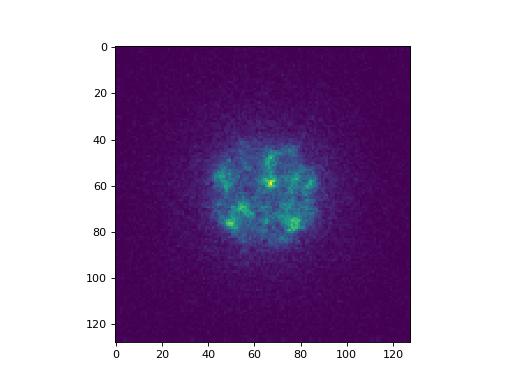

In [10]:
fig, axes = plt.subplots()
axes.imshow(pick_result)

In [13]:
def all_ones():
    return np.ones((detector_y, detector_x))

In [14]:
def single_pixel():
    buf = np.zeros((detector_y, detector_x))
    buf[int(cy), int(cx)] = 1
    return buf

Here we use a mask job. Jobs generally use the LiberTEM computation rather directly and return a simple numerical result. See further below for examples that use the high-level analysis interface instead.

In [15]:
mask_job = ctx.create_mask_job(factories=[all_ones, single_pixel], dataset=ds)

In [21]:
%%time
mask_job_result = ctx.run(mask_job)

CPU times: user 10.2 s, sys: 1.33 s, total: 11.5 s
Wall time: 1min 10s


In [22]:
print(mask_job_result)

[[[2.7850326e+07 2.8474082e+07 2.9206840e+07 ... 2.8496848e+07
   2.8388552e+07 2.8217776e+07]
  [2.8612170e+07 2.8955478e+07 2.9521830e+07 ... 2.8629366e+07
   2.8697180e+07 2.8371278e+07]
  [2.8774528e+07 2.8422560e+07 2.9332142e+07 ... 2.8734416e+07
   2.8855778e+07 2.8983198e+07]
  ...
  [2.6167280e+07 2.7059746e+07 2.7660702e+07 ... 2.7118112e+07
   2.7208242e+07 2.7266396e+07]
  [2.6604564e+07 2.7274432e+07 2.7053774e+07 ... 2.6818202e+07
   2.6966516e+07 2.6932804e+07]
  [2.6721504e+07 2.7176444e+07 2.6789558e+07 ... 2.6511148e+07
   2.7037478e+07 2.7278708e+07]]

 [[9.8632012e+03 1.1829065e+04 6.4907241e+03 ... 7.8916709e+03
   6.4616729e+03 6.6092720e+03]
  [1.1411631e+04 1.3569099e+04 7.5474136e+03 ... 8.4308838e+03
   8.4330840e+03 4.6807437e+03]
  [1.0615640e+04 1.0571748e+04 7.0387822e+03 ... 1.2167771e+04
   7.0404971e+03 7.9976006e+03]
  ...
  [7.0915308e+03 1.1770922e+04 7.2148408e+03 ... 5.4679028e+03
   5.9941973e+03 6.1371060e+03]
  [7.2146392e+03 1.5155479e+04 8.181

<IPython.core.display.Javascript object>


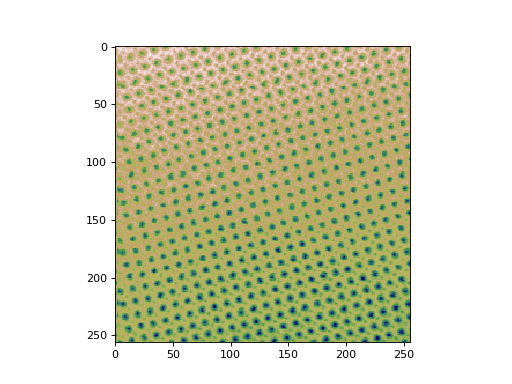

In [23]:
fig, axes = plt.subplots()
axes.imshow(mask_job_result[0], cmap=cm.gist_earth)

<IPython.core.display.Javascript object>


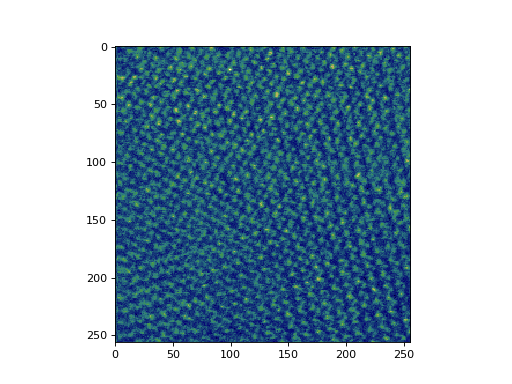

In [24]:
fig, axes = plt.subplots()
axes.imshow(mask_job_result[1], cmap=cm.gist_earth)

In [25]:
mask_analysis = ctx.create_mask_analysis(dataset=ds, factories=[all_ones, single_pixel])

In [26]:
%time mask_analysis_result = ctx.run(mask_analysis)

CPU times: user 9.36 s, sys: 1.26 s, total: 10.6 s
Wall time: 1min 6s


In [27]:
print(mask_analysis_result)

[<AnalysisResult: mask_0>, <AnalysisResult: mask_1>]


In [28]:
print(mask_analysis_result[0])

title: mask 0
desc: integrated intensity for mask 0
key: mask_0
raw_data: [[27850326. 28474082. 29206840. ... 28496848. 28388552. 28217776.]
 [28612170. 28955478. 29521830. ... 28629366. 28697180. 28371278.]
 [28774528. 28422560. 29332142. ... 28734416. 28855778. 28983198.]
 ...
 [26167280. 27059746. 27660702. ... 27118112. 27208242. 27266396.]
 [26604564. 27274432. 27053774. ... 26818202. 26966516. 26932804.]
 [26721504. 27176444. 26789558. ... 26511148. 27037478. 27278708.]]
visualized: [[[186 175  96 255]
  [200 166 120 255]
  [229 199 187 255]
  ...
  [201 167 123 255]
  [197 164 113 255]
  [191 164 100 255]]

 [[206 171 132 255]
  [219 183 162 255]
  [241 222 220 255]
  ...
  [207 172 135 255]
  [209 173 140 255]
  [197 164 113 255]]

 [[212 176 147 255]
  [198 165 115 255]
  [235 209 202 255]
  ...
  [211 175 145 255]
  [216 179 154 255]
  [220 185 164 255]]

 ...

 [[ 91 159  74 255]
  [150 174  87 255]
  [183 181  94 255]
  ...
  [153 174  88 255]
  [159 176  89 255]
  [163 177

<IPython.core.display.Javascript object>


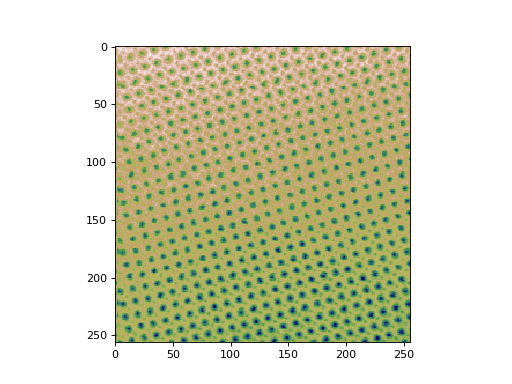

In [29]:
fig, axes = plt.subplots()
axes.imshow(mask_analysis_result[0].visualized)

<IPython.core.display.Javascript object>


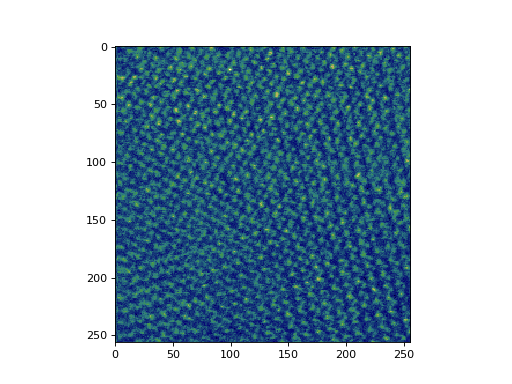

In [30]:
fig, axes = plt.subplots()
axes.imshow(mask_analysis_result[1].visualized)

In [31]:
ro = min(detector_x,detector_y)/2
haadf_analysis = ctx.create_ring_analysis(dataset=ds, cx=cx, cy=cy, ro=ro, ri=ro*0.8)

In [32]:
%time haadf_result = ctx.run(haadf_analysis)

CPU times: user 10.2 s, sys: 1.27 s, total: 11.5 s
Wall time: 1min 8s


In [33]:
print(haadf_result)

[<AnalysisResult: intensity>]


In [34]:
print(haadf_result.intensity)

title: intensity
desc: intensity of the integration over the selected ring
key: intensity
raw_data: [[1430498.1 1472582.9 1331890.9 ... 1406989.  1441294.4 1464622.2]
 [1390670.1 1441176.6 1347792.8 ... 1302910.9 1314042.1 1347872.8]
 [1407068.  1564187.8 1444740.5 ... 1396887.6 1321351.  1317518.5]
 ...
 [1905181.6 1706497.5 1620345.5 ... 1792412.8 1785900.2 1752096.8]
 [1795231.6 1651400.9 1675191.5 ... 1867160.5 1833695.4 1820662. ]
 [1758158.  1666727.5 1691829.8 ... 1918685.  1812729.6 1776172.5]]
visualized: [[[ 38 105 125 255]
  [ 43 118 126 255]
  [ 25  69 121 255]
  ...
  [ 35  97 124 255]
  [ 39 109 125 255]
  [ 43 116 126 255]]

 [[ 33  92 123 255]
  [ 39 109 125 255]
  [ 27  75 121 255]
  ...
  [ 21  56 120 255]
  [ 22  60 120 255]
  [ 27  75 121 255]]

 [[ 35  97 124 255]
  [ 54 135 111 255]
  [ 40 110 125 255]
  ...
  [ 33  94 123 255]
  [ 23  64 121 255]
  [ 23  62 120 255]]

 ...

 [[145 172  86 255]
  [ 67 152  76 255]
  [ 59 141  98 255]
  ...
  [102 162  77 255]
  [ 

<IPython.core.display.Javascript object>


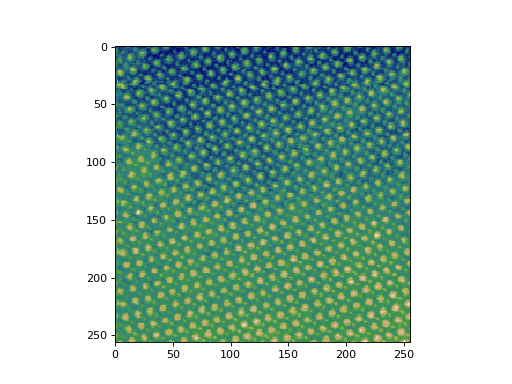

In [35]:
fig, axes = plt.subplots()
axes.imshow(haadf_result.intensity.visualized)

In [36]:
bf_analysis = ctx.create_disk_analysis(dataset=ds, cx=cx, cy=cy, r=ro*0.3)

In [37]:
%time bf_result = ctx.run(bf_analysis)

CPU times: user 9.41 s, sys: 1.27 s, total: 10.7 s
Wall time: 1min 1s


In [38]:
print(bf_result)

[<AnalysisResult: intensity>]


In [39]:
print(bf_result.intensity)

title: intensity
desc: intensity of the integration over the selected disk
key: intensity
raw_data: [[11855892. 12050526. 13056826. ... 12369484. 11876223. 11598537.]
 [12859638. 12649295. 13449516. ... 12338374. 12118208. 11864103.]
 [13009234. 11589958. 12699813. ... 12133116. 12087128. 12033630.]
 ...
 [ 9925932. 10641336. 11301420. ... 10896898. 11075715. 11224715.]
 [10470585. 11345228. 10838043. ... 10156356. 10719042. 10770757.]
 [10751518. 11299932. 10408881. ...  9766378. 10741135. 10775175.]]
visualized: [[[173 180  92 255]
  [181 182  93 255]
  [199 166 118 255]
  ...
  [186 175  96 255]
  [173 180  92 255]
  [159 176  89 255]]

 [[192 163 103 255]
  [190 168  99 255]
  [212 176 147 255]
  ...
  [186 175  96 255]
  [183 181  94 255]
  [173 180  92 255]]

 [[198 165 115 255]
  [159 176  89 255]
  [190 167  99 255]
  ...
  [183 181  94 255]
  [182 182  94 255]
  [181 182  93 255]]

 ...

 [[ 67 152  76 255]
  [111 164  79 255]
  [145 172  86 255]
  ...
  [125 167  82 255]
  [1

<IPython.core.display.Javascript object>


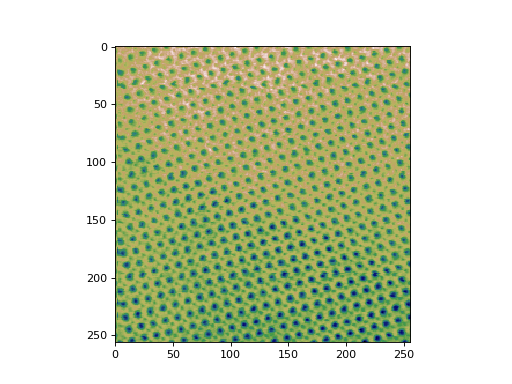

In [40]:
fig, axes = plt.subplots()
axes.imshow(bf_result.intensity.visualized)

In [41]:
point_analysis = ctx.create_point_analysis(dataset=ds, x=cx, y=cy)

In [42]:
%time point_result = ctx.run(point_analysis)

CPU times: user 4.92 s, sys: 666 ms, total: 5.58 s
Wall time: 31.7 s


In [43]:
print(point_result)

[<AnalysisResult: intensity>]


In [44]:
print(point_result.intensity)

title: intensity
desc: intensity of the integration over the selected point
key: intensity
raw_data: [[ 9863.201  11829.065   6490.724  ...  7891.671   6461.673   6609.272 ]
 [11411.631  13569.099   7547.4136 ...  8430.884   8433.084   4680.7437]
 [10615.64   10571.748   7038.782  ... 12167.771   7040.497   7997.6006]
 ...
 [ 7091.531  11770.922   7214.841  ...  5467.903   5994.1973  6137.106 ]
 [ 7214.639  15155.479   8181.688  ...  5985.63    6306.6313  6185.5386]
 [10637.375  13987.006   5301.716  ...  4848.8687  6378.0674  6715.919 ]]
visualized: [[[ 30  84 122 255]
  [ 37 104 124 255]
  [ 17  45 119 255]
  ...
  [ 23  62 120 255]
  [ 17  43 119 255]
  [ 17  45 119 255]]

 [[ 36 101 124 255]
  [ 44 120 126 255]
  [ 21  58 120 255]
  ...
  [ 25  69 121 255]
  [ 25  69 121 255]
  [ 10  20 117 255]]

 [[ 33  92 123 255]
  [ 33  92 123 255]
  [ 19  52 119 255]
  ...
  [ 39 107 125 255]
  [ 19  52 119 255]
  [ 23  62 120 255]]

 ...

 [[ 19  52 119 255]
  [ 37 104 124 255]
  [ 20  54 12

<IPython.core.display.Javascript object>


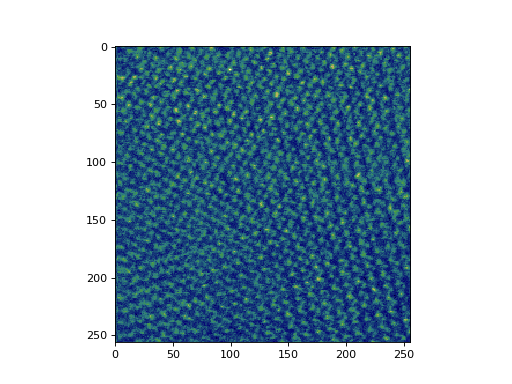

In [45]:
fig, axes = plt.subplots()
axes.imshow(point_result.intensity.visualized)

In [46]:
sum_analysis = ctx.create_sum_analysis(dataset=ds)

In [47]:
%time sum_result = ctx.run(sum_analysis)

CPU times: user 12.4 s, sys: 1.48 s, total: 13.9 s
Wall time: 1min 32s


In [48]:
print(sum_result)

[<AnalysisResult: intensity>]


<IPython.core.display.Javascript object>


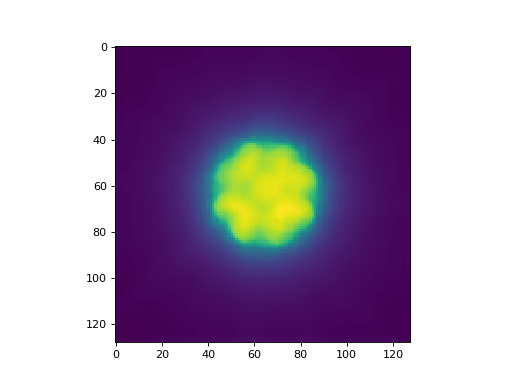

In [49]:
fig, axes = plt.subplots()
axes.imshow(sum_result.intensity.raw_data)